# CNN

Setup CNN to predict the joint coordinates for any image.

### Load dataset

In [ ]:
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# load pickle data
objects = []
with (open("data_hand_pose.pickle", "rb")) as openfile: # read as binary
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [ ]:
images = objects[0]["images"]
joints = objects[0]["joints"]
print(images.shape)
print(joints.shape)

(9432, 64, 64, 3)
(9432, 21, 2)


In [ ]:
# flatten the joints arrays
flattened_joints = []
for each in joints:
  each_flattened = [coord for row in each for coord in row]
  flattened_joints.append(each_flattened)

flattened_joints = np.asarray(flattened_joints)
print(flattened_joints.shape)

(9432, 42)


In [ ]:
# train-val-test split
X_train, X_test, y_train, y_test = train_test_split(images, flattened_joints, test_size=0.1, random_state=42)

### Create Model

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()

# this is a deep network. shorter networks might work too
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=images.shape[1:]))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(flattened_joints.shape[1])) # 42 coordinates
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 64, 64, 32)        864       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 32)        9216      
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)       

In [ ]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5,
                                            min_lr=0.000001, cooldown=3)
early_stopping = EarlyStopping(monitor='val_loss',patience=5, verbose=1,restore_best_weights=True)

In [ ]:
history = model.fit(X_train,y_train,epochs = 100,batch_size = 256,validation_split = 0.1,
                    callbacks=[learning_rate_reduction, early_stopping])


Train on 7639 samples, validate on 849 samples
Epoch 1/100
7639/7639 [==============================] - 14s 2ms/step - loss: 222.9712 - mae: 11.0421 - val_loss: 148.8199 - val_mae: 9.5098
Epoch 2/100
7639/7639 [==============================] - 11s 1ms/step - loss: 42.2899 - mae: 4.9020 - val_loss: 82.3916 - val_mae: 7.3453
Epoch 3/100
7639/7639 [==============================] - 11s 1ms/step - loss: 31.5808 - mae: 4.1746 - val_loss: 61.5986 - val_mae: 6.1934
Epoch 4/100
7639/7639 [==============================] - 11s 1ms/step - loss: 27.6861 - mae: 3.9048 - val_loss: 55.7801 - val_mae: 5.8319
Epoch 5/100
7639/7639 [==============================] - 11s 1ms/step - loss: 24.2304 - mae: 3.6471 - val_loss: 50.6679 - val_mae: 5.5785
Epoch 6/100
7639/7639 [==============================] - 11s 1ms/step - loss: 21.5784 - mae: 3.4417 - val_loss: 44.0907 - val_mae: 5.2544
Epoch 7/100
7639/7639 [==============================] - 11s 1ms/step - loss: 19.0352 - mae: 3.2257 - val_loss: 33.9084 - 

Text(0.5, 1.0, 'Training and validation loss')

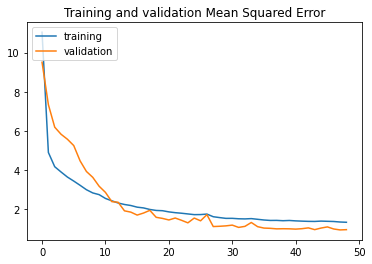

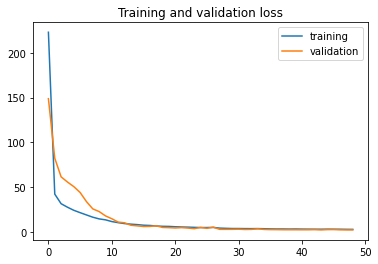

In [ ]:
# visualize loss and mae
mae = history.history['mae']
val_mae = history.history['val_mae']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(mae))

# Plot training and validation accuracy per epoch
plt.plot(epochs, mae, label = "training")
plt.plot(epochs, val_mae, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation Mean Squared Error')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

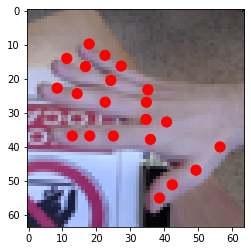

In [ ]:
# visualize a prediction
from matplotlib.pyplot import Circle
import random

random_n = random.randint(0,len(X_test)-1)
preds = model.predict(X_test[random_n].reshape((1,64,64,3)))

fig, ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(X_test[random_n].reshape((64,64,3)))

for xx, yy in preds.reshape((21,2)):
    circ = Circle((xx,yy),1.5,color='red')
    ax.add_patch(circ)